<b><p style="font-size:30px">Airline Stock Performance & Risk Analysis (2020–2025)</p></b>

<b><p style="font-size:22px">Overview</b></p>

<p style="font-size:16px">This project analyzes the stock performance and return volatility of the four largest 
U.S. airlines — <b>American (AAL)</b>, <b>Delta (DAL)</b>, <b>Southwest (LUV)</b>, and <b>United (UAL)</b> 
— using five years of historical data from the Yahoo Finance API.</p>
<p style="font-size:16px">The goal was to identify post-pandemic recovery trends and evaluate investment risk using daily returns and volatility metrics.</p>

<b><p style="font-size:22px">Library Imports</b></p>

In [1]:
# This is used to for data ETL using the Yahoo Finance API
import yfinance as yf

In [2]:
# Imports for exploatory data analysis (EDA), data cleaning, and visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b><p style="font-size:22px">Connecting to API and Obtaining Data</b></p>

In [3]:
# get_stock_history: Function to obtain stock data on a rolling 5-year period from Yahoo Finance
def get_stock_history(ticker):
    data = yf.Ticker(ticker).history(period="5y")
    data['ticker'] = ticker
    return data

In [4]:
# It will obtain the stock data on a rolling 5-year period for the following airlines
# American: AAL
# Delta: DAL
# Southwest: LUV
# United: UAL

# The stock data for all four airlines will be consolidated into one dataframe by calling the get_stock_history function
tickers = ["AAL", "DAL", "LUV", "UAL"]
df = pd.concat([get_stock_history(t) for t in tickers])

<b><p style="font-size:22px">Data Validation & Cleaning</b></p>

In [5]:
# Information on newly-created dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5024 entries, 2020-10-22 00:00:00-04:00 to 2025-10-22 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5024 non-null   float64
 1   High          5024 non-null   float64
 2   Low           5024 non-null   float64
 3   Close         5024 non-null   float64
 4   Volume        5024 non-null   int64  
 5   Dividends     5024 non-null   float64
 6   Stock Splits  5024 non-null   float64
 7   ticker        5024 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 353.2+ KB


In [6]:
# Output the first ten rows of dataframe
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2020-10-22 00:00:00-04:00,12.60,13.29,12.42,13.15,90788900,0.0,0.0,AAL
2020-10-23 00:00:00-04:00,13.07,13.08,12.42,12.60,90787900,0.0,0.0,AAL
2020-10-26 00:00:00-04:00,12.39,12.45,11.67,11.80,85349600,0.0,0.0,AAL
2020-10-27 00:00:00-04:00,11.77,11.79,11.20,11.23,65803400,0.0,0.0,AAL
2020-10-28 00:00:00-04:00,10.89,11.16,10.63,10.95,64399800,0.0,0.0,AAL
2020-10-29 00:00:00-04:00,10.96,11.29,10.89,11.16,44070600,0.0,0.0,AAL
2020-10-30 00:00:00-04:00,11.06,11.42,10.98,11.28,51284700,0.0,0.0,AAL
2020-11-02 00:00:00-05:00,11.32,11.34,10.87,11.19,41094500,0.0,0.0,AAL
2020-11-03 00:00:00-05:00,11.34,11.45,11.15,11.25,43775200,0.0,0.0,AAL


In [7]:
# Output last ten rows of dataframe
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2025-10-09 00:00:00-04:00,103.610001,106.199997,99.519997,101.339996,8098000,0.0,0.0,UAL
2025-10-10 00:00:00-04:00,101.720001,103.870003,96.389999,96.669998,6656800,0.0,0.0,UAL
2025-10-13 00:00:00-04:00,98.309998,100.900002,97.769997,99.250000,4611600,0.0,0.0,UAL
2025-10-14 00:00:00-04:00,97.500000,103.849998,97.199997,103.150002,6591800,0.0,0.0,UAL
2025-10-15 00:00:00-04:00,103.940002,104.529999,102.730003,104.050003,10114200,0.0,0.0,UAL
2025-10-16 00:00:00-04:00,102.940002,106.449997,94.050003,98.190002,24758500,0.0,0.0,UAL
2025-10-17 00:00:00-04:00,98.379997,100.089996,97.599998,99.139999,7564300,0.0,0.0,UAL
2025-10-20 00:00:00-04:00,99.320000,103.050003,98.239998,101.290001,7564500,0.0,0.0,UAL
2025-10-21 00:00:00-04:00,100.879997,101.669998,99.419998,100.110001,5739700,0.0,0.0,UAL


In [8]:
# As the date is an index, this will make the date a column in the dataframe
df = df.reset_index().rename(columns={'index': 'Date'})

In [9]:
# Outputting the info after making the Date into a column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          5024 non-null   datetime64[ns, America/New_York]
 1   Open          5024 non-null   float64                         
 2   High          5024 non-null   float64                         
 3   Low           5024 non-null   float64                         
 4   Close         5024 non-null   float64                         
 5   Volume        5024 non-null   int64                           
 6   Dividends     5024 non-null   float64                         
 7   Stock Splits  5024 non-null   float64                         
 8   ticker        5024 non-null   object                          
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1), object(1)
memory usage: 353.4+ KB


In [10]:
# Output the first six rows of the dataframe -- verify the Date field is no longer an index, but a column
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2020-10-22 00:00:00-04:00,12.60,13.29,12.42,13.15,90788900,0.0,0.0,AAL
1,2020-10-23 00:00:00-04:00,13.07,13.08,12.42,12.60,90787900,0.0,0.0,AAL
2,2020-10-26 00:00:00-04:00,12.39,12.45,11.67,11.80,85349600,0.0,0.0,AAL
3,2020-10-27 00:00:00-04:00,11.77,11.79,11.20,11.23,65803400,0.0,0.0,AAL
4,2020-10-28 00:00:00-04:00,10.89,11.16,10.63,10.95,64399800,0.0,0.0,AAL


In [11]:
# The Date field is a timestamp. This will change the format of the values into YYYY-MM-DD
df['Date'] = df['Date'].dt.date

In [12]:
# Viewing the first six rows of the dataframe to verify the new format of the Date field.
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
0,2020-10-22,12.60,13.29,12.42,13.15,90788900,0.0,0.0,AAL
1,2020-10-23,13.07,13.08,12.42,12.60,90787900,0.0,0.0,AAL
2,2020-10-26,12.39,12.45,11.67,11.80,85349600,0.0,0.0,AAL
3,2020-10-27,11.77,11.79,11.20,11.23,65803400,0.0,0.0,AAL
4,2020-10-28,10.89,11.16,10.63,10.95,64399800,0.0,0.0,AAL


In [13]:
# Only keep the columns needed for analysis
select_cols = ['Date', 'Close', 'ticker']
df = df[select_cols]

In [14]:
# View info on the dataframe that has been reduced to three columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5024 non-null   object 
 1   Close   5024 non-null   float64
 2   ticker  5024 non-null   object 
dtypes: float64(1), object(2)
memory usage: 117.9+ KB


In [15]:
# View first 6 rows of new dataframe
df.head()

,Date,Close,ticker
0,2020-10-22,13.15,AAL
1,2020-10-23,12.60,AAL
2,2020-10-26,11.80,AAL
3,2020-10-27,11.23,AAL
4,2020-10-28,10.95,AAL


<b><p style="font-size:22px">Trend Analysis</b></p>

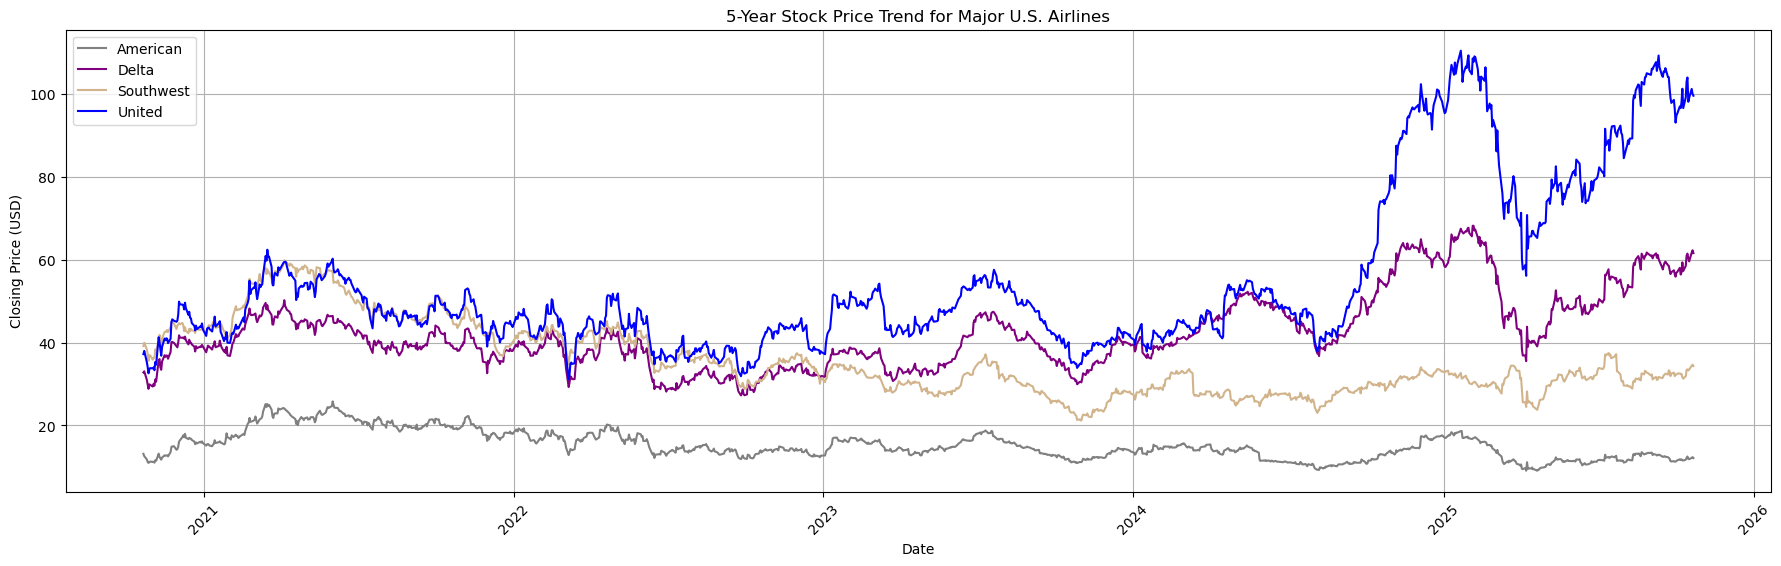

In [16]:
# Time-series chart comparing the closing prices for the four companies during the past rolling five years
plt.figure(figsize=(22,6))

plt.plot(df.loc[df['ticker'] == 'AAL', 'Date'],
         df.loc[df['ticker'] == 'AAL', 'Close'],
         color='gray', label='American')

plt.plot(df.loc[df['ticker'] == 'DAL', 'Date'],
         df.loc[df['ticker'] == 'DAL', 'Close'],
         color='purple', label='Delta')

plt.plot(df.loc[df['ticker'] == 'LUV', 'Date'],
         df.loc[df['ticker'] == 'LUV', 'Close'],
         color='tan', label='Southwest')

plt.plot(df.loc[df['ticker'] == 'UAL', 'Date'],
         df.loc[df['ticker'] == 'UAL', 'Close'],
         color='blue', label='United')

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.xticks(rotation=45)
plt.title("5-Year Stock Price Trend for Major U.S. Airlines")
plt.legend()
plt.grid(True)
plt.show()

<p style="font-size:16px">United has had the highest recovery in stock prices since mid-2024. Delta experienced a gradual increase during this period.</p>

<b><p style="font-size:22px">Returns</b></p>

In [17]:
# 'return' field created to calculate stock return for each day
df['return'] = df.groupby('ticker')['Close'].pct_change()

In [18]:
# View the first 6 rows of the dataframe after the 'return' column added
df.head()

,Date,Close,ticker,return
0,2020-10-22,13.15,AAL,NaN
1,2020-10-23,12.60,AAL,-0.041825
2,2020-10-26,11.80,AAL,-0.063492
3,2020-10-27,11.23,AAL,-0.048305
4,2020-10-28,10.95,AAL,-0.024933


In [19]:
# A new dataframe named ret_df that will include the returns of each airline during the rolling five-year period
select_cols = ['Date', 'ticker', 'return']
ret_df = df[select_cols]

In [20]:
# Info regarding the ret_df dataframe
ret_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5024 non-null   object 
 1   ticker  5024 non-null   object 
 2   return  5020 non-null   float64
dtypes: float64(1), object(2)
memory usage: 117.9+ KB


In [21]:
# A pivot table for returns dataframe
# This will be used for further statistical analysis
returns_pivot = pd.pivot_table(data=ret_df, values='return', index='Date', columns='ticker', aggfunc='sum')

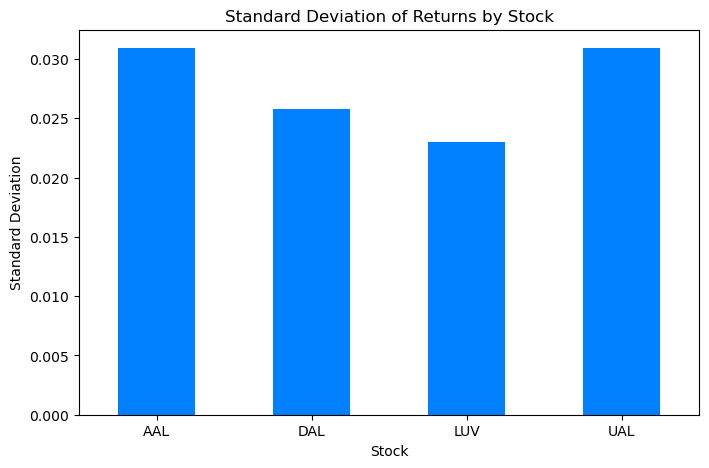

In [22]:
# Visualization for standard deviation of returns for each stock.

# A variable to calculate the standard deviation of the stock returns
ret_std = returns_pivot.std()

fig, ax = plt.subplots(figsize=(8, 5))
ret_std.plot(kind='bar', ax=ax, color='#007fff')
ax.set_title('Standard Deviation of Returns by Stock')
ax.set_xlabel('Stock')
ax.set_ylabel('Standard Deviation')
ax.tick_params(axis='x', rotation=0) # Keeps labels horizontal
plt.show()

<p style="font-size:16px">American and United are the riskiest for returns. Southwest and Delta are the least riskiest for returns.</p>

<b><p style="font-size:22px">Risk Analysis</b></p>

In [23]:
# A new dataframe created to calculate the means of the stock returns
ret_mean = pd.DataFrame(returns_pivot.mean())
ret_mean.reset_index(inplace=True)
ret_mean = ret_mean.rename(columns = {0:'mean'})

In [24]:
# View records of the mean dataframe created
ret_mean.head()

,ticker,mean
0,AAL,0.000409
1,DAL,0.000831
2,LUV,0.000160
3,UAL,0.001256


In [25]:
# A dataframe that consolidates the standard deviations and means of each stock
# Before that, the ret_std variable needs to be converted to a dataframe

ret_std = pd.DataFrame(returns_pivot.std())
ret_std.reset_index(inplace=True)
ret_std = ret_std.rename(columns = {0:'std'})

In [26]:
# Joining the ret_mean and ret_std dataframes to create the ret_summary dataframe
# The dataframes will be inner joined on the 'ticker' field
ret_summary = ret_mean.merge(ret_std, how='inner')

In [27]:
# View the records of the ret_summary dataset
ret_summary.head()

,ticker,mean,std
0,AAL,0.000409,0.030897
1,DAL,0.000831,0.025817
2,LUV,0.000160,0.022984
3,UAL,0.001256,0.030933


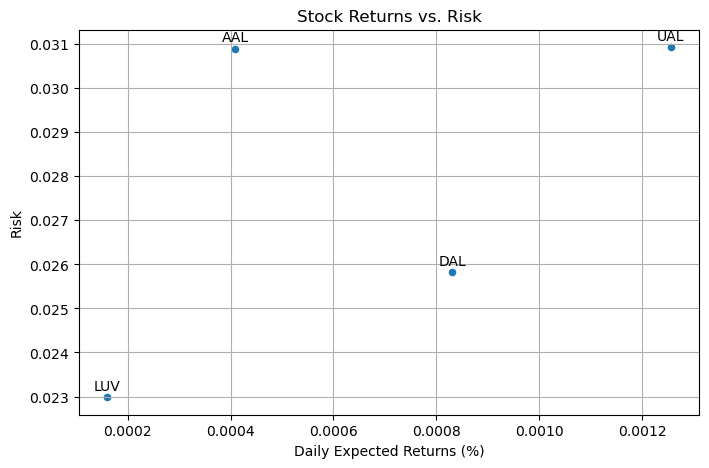

In [28]:
# A scatterplot will identify the returns and risks of each stock
ax = ret_summary.plot(kind='scatter', x='mean', y='std', figsize=(8,5))
ax.set(title='Stock Returns vs. Risk',
       xlabel='Daily Expected Returns (%)',
       ylabel='Risk')

# Each stock is represented by a point in the scatterplot
for idx, row in ret_summary.iterrows():
    ax.annotate(row['ticker'], (row['mean'], row['std']),
                size=10, ha='center', va="bottom",  
                textcoords='offset points', xytext=(0, 3))

plt.grid(True)
plt.show()

<p style="font-size:16px">American Airlines (AAL) and United Airlines (UAL) are the riskiest stocks, exhibiting the highest volatility in returns.</p>

<p style="font-size:16px">Delta Air Lines (DAL) offers a favorable balance of high expected return and low risk, making it an attractive option for conservative investors seeking stable performance.</p>

<p style="font-size:16px">Southwest Airlines (LUV) shows slightly lower expected returns than Delta but with even lower volatility, appealing to risk-averse investors who prioritize consistency over growth.</p>

<p style="font-size:16px">Overall, Delta provides the best risk-adjusted performance, while American and United deliver higher risk without commensurate return.</p>